In [54]:
import time
import subprocess
import matplotlib.pyplot as plt
import psutil
import compiler as cp


In [22]:
vm_code_template = "DT_IMMI,0,DT_STO_IMMI,0,1,DT_LOD,0,DT_ADD,DT_LOD,0,DT_INC,DT_STO,0,DT_LOD,0,DT_IMMI,{loop_count},DT_GT,DT_JZ,5,DT_PRINT,DT_END"
loop_counts = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
vm_programs = ["./build/thd_vm_routine", "./build/thd_vm_indirect", "./build/thd_vm_direct"]
execution_times = {vm: [] for vm in vm_programs}

55
55
55
5050
5050
5050
500500
500500
500500
50005000
50005000
50005000
705082704
705082704
705082704
1784293664
1784293664
1784293664
-2004260032
-2004260032
-2004260032
987459712
987459712
987459712


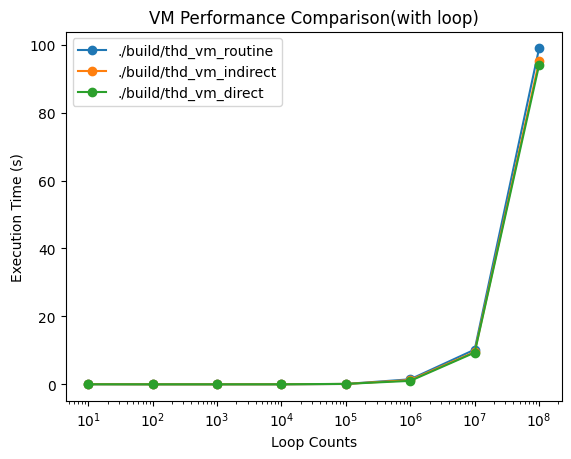

In [43]:
for count in loop_counts:
    vm_code = vm_code_template.format(loop_count=count)
    cp.binary(vm_code)
    
    for vm_program in vm_programs:
        start_time = time.time()
        subprocess.run([vm_program, "program.bin"])
        end_time = time.time()
        execution_times[vm_program].append(end_time - start_time)

for vm_program, times in execution_times.items():
    plt.plot(loop_counts, times, marker='o', label=vm_program)

plt.xscale('log') 
plt.xlabel('Loop Counts')
plt.ylabel('Execution Time (s)')
plt.title('VM Performance Comparison(with loop)')
plt.legend()
plt.show()

In [44]:
print(execution_times)

{'./build/thd_vm_routine': [0.028923749923706055, 0.0053102970123291016, 0.006834268569946289, 0.01459193229675293, 0.10991907119750977, 1.4907128810882568, 10.227607011795044, 98.92516016960144], './build/thd_vm_indirect': [0.035974979400634766, 0.006515979766845703, 0.006492137908935547, 0.016061782836914062, 0.11834406852722168, 1.2532830238342285, 9.54233193397522, 95.15445113182068], './build/thd_vm_direct': [0.02149486541748047, 0.006124019622802734, 0.005473136901855469, 0.013946771621704102, 0.13631296157836914, 1.0226128101348877, 9.351232051849365, 94.02672123908997]}


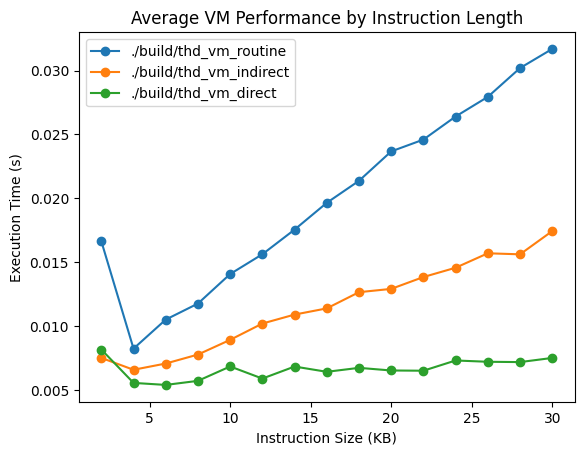

In [61]:
sizes_kb = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30]
instruction_size = 4
num_repeats = 20
execution_times = {vm: [] for vm in vm_programs}
for size_kb in sizes_kb:
    num_instructions = (size_kb * 1024) // instruction_size
    vm_code = "DT_IMMI,1," * num_instructions
    vm_code = vm_code.rstrip(',')
    cp.binary(vm_code)
    for vm_program in vm_programs:
        repeat_times = []
        for _ in range(num_repeats):
            start_time = time.time()
            subprocess.run([vm_program, "program.bin"])
            end_time = time.time()
            repeat_times.append(end_time - start_time)
        average_time = sum(repeat_times) / num_repeats
        execution_times[vm_program].append(average_time)
for vm_program, times in execution_times.items():
    plt.plot(sizes_kb, times, marker='o', label=vm_program)

plt.xlabel('Instruction Size (KB)')
plt.ylabel('Execution Time (s)')
plt.title('Average VM Performance by Instruction Length')
plt.legend()
plt.show()

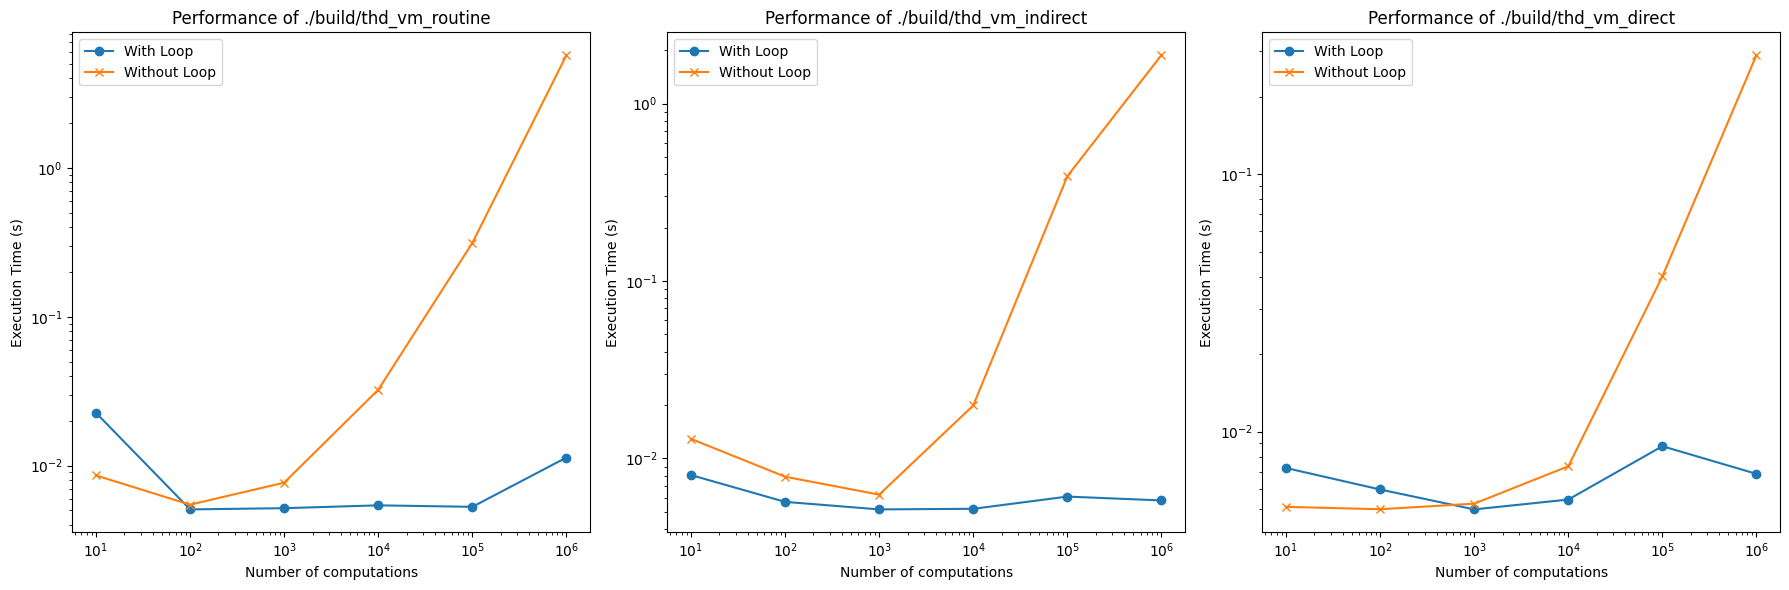

In [82]:
loop_counts = [10,100, 1000, 10000, 100000,1000000]
execution_times = {vm: {'with_loop': [], 'without_loop': []} for vm in vm_programs}
def run_vm(vm_program, vm_code):
    cp.binary(vm_code)
    start_time = time.time()
    subprocess.run([vm_program, "program.bin"])
    end_time = time.time()
    return end_time - start_time

for count in loop_counts:
    loop_code = f"DT_IMMI,0,DT_STO_IMMI,0,1,DT_LOD,0,DT_INC,DT_STO,0,DT_LOD,0,DT_IMMI,{count},DT_LT,DT_JZ,5,DT_END"
    no_loop_code = "DT_IMMI,1,"+"DT_INC," * count + "DT_END"
    for vm_program in vm_programs:
        execution_times[vm_program]['with_loop'].append(run_vm(vm_program, loop_code))
        execution_times[vm_program]['without_loop'].append(run_vm(vm_program, no_loop_code))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, vm_program in enumerate(vm_programs):
    axes[i].plot(loop_counts, execution_times[vm_program]['with_loop'], marker='o', label='With Loop')
    axes[i].plot(loop_counts, execution_times[vm_program]['without_loop'], marker='x', label='Without Loop')
    axes[i].set_xlabel('Number of computations')
    axes[i].set_ylabel('Execution Time (s)')
    axes[i].set_title(f'Performance of {vm_program}')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [81]:
print(execution_times)

{'./build/thd_vm_routine': {'with_loop': [0.043792009353637695, 0.006246328353881836, 0.005139827728271484, 0.006555318832397461, 0.0058841705322265625, 0.0054836273193359375], 'without_loop': [0.008348226547241211, 0.0052411556243896484, 0.008661985397338867, 0.056989192962646484, 0.3929300308227539, 3.3086931705474854]}, './build/thd_vm_indirect': {'with_loop': [0.018847942352294922, 0.005994081497192383, 0.005192995071411133, 0.010715961456298828, 0.0068187713623046875, 0.005807161331176758], 'without_loop': [0.011139869689941406, 0.007608890533447266, 0.007714986801147461, 0.023057222366333008, 0.18634700775146484, 1.773360013961792]}, './build/thd_vm_direct': {'with_loop': [0.019253015518188477, 0.0062389373779296875, 0.0053751468658447266, 0.005135059356689453, 0.00591588020324707, 0.005473136901855469], 'without_loop': [0.007462739944458008, 0.004884004592895508, 0.0055539608001708984, 0.007513999938964844, 0.026751279830932617, 0.2550852298736572]}}
